# Advertising Budgets-Sales Challenge

In this challenge, you'll explore a real-world dataset containing Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.

- **TV**: Spend on TV Advertisements
- **Radio**: Spend on radio Advertisements
- **Newspaper**: Spend on newspaper Advertisements
- **Sales**: Sales revenue generated


In [54]:
df_advertisement = pd.read_csv('advertising.csv')

The challenge is to explore the dataset to analyze and identify which media contribute to sales and to find a function that given input budgets for TV, radio and newspaper predicts the output sales.

1. Start by cleaning the data.
   R - Identify any null or missing data, and impute appropriate replacement values.
   R - Describe and identify statistical parameters for each column.

2. Determine the relationship between the advertising budgets and sales, and to build a predictive model that can estimate sales based on the given budgets for TV, radio, and newspaper.
   **Exploratory Data Analysis (EDA)**: 
   * Describe and visualize the data to understand the distribution and relationships between variables
   * Calculate and plot heatmap correlation and pairwise correlations
   **Feature Engineering**: 
   * Create any additional features that might help in the analysis. Will be explained later.
   * Splitting data into training and test datasets. 
   * Train_Set_Size need to be 90% and Test_Set_Size 10%.
3. Apply any machine learning algorithm on the dataset   
   * Load the algorithm
   * Instantiate and Fit the model to the training dataset
   * Prediction on the test set
   * Evaluate with 3 different metrics. 
4. Create a new feature called Area, and randomly assign observations to be rural, suburban, or urban, this variable need to have gaussian distribution.
   * Plot the new data distribution according to the new feature.
   * Transform feature to numerical. Create additional dummy binary variables that describe the feature:
      - rural is coded as Area_suburban = 0 and Area_urban = 0
      - suburban is coded as Area_suburban = 1 and Area_urban = 0
      - urban is coded as Area_suburban = 0 and Area_urban = 1
   * Apply Number 3 step again with this dataset.
4. Answer next questions:
- Is there a relationship between sales and spend various advertising channels?
- Which is the channel with more relationship with sales?
- Which is the model that describe both problems?
- Which is the best channel to increase sales?
- Which is the worst channel to increase sales?



In [83]:
import pandas as pd
import numpy as np

In [84]:
# Cargar el conjunto de datos
df_advertisement = pd.read_csv('advertising.csv')
df_advertisement.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1. Limpieza de datos

In [85]:
# Verificar si hay datos nulos en el DataFrame
print("Valores nulos en cada columna:")
print(df_advertisement.isnull().sum())

# Imputar valores nulos si existen
df_advertisement.fillna(df_advertisement.mean(), inplace=True)

# Verificar nuevamente si hay datos nulos
print("Valores nulos después de la imputación:")
print(df_advertisement.isnull().sum())

Valores nulos en cada columna:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64
Valores nulos después de la imputación:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [86]:
# Obtener estadísticas descriptivas del DataFrame
print("Estadísticas descriptivas:")
print(df_advertisement.describe())

Estadísticas descriptivas:
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


## 2. Determinacion de relación entre los presupuestos de publicidad, ventas,  y contruccion de un modelo predictivo

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

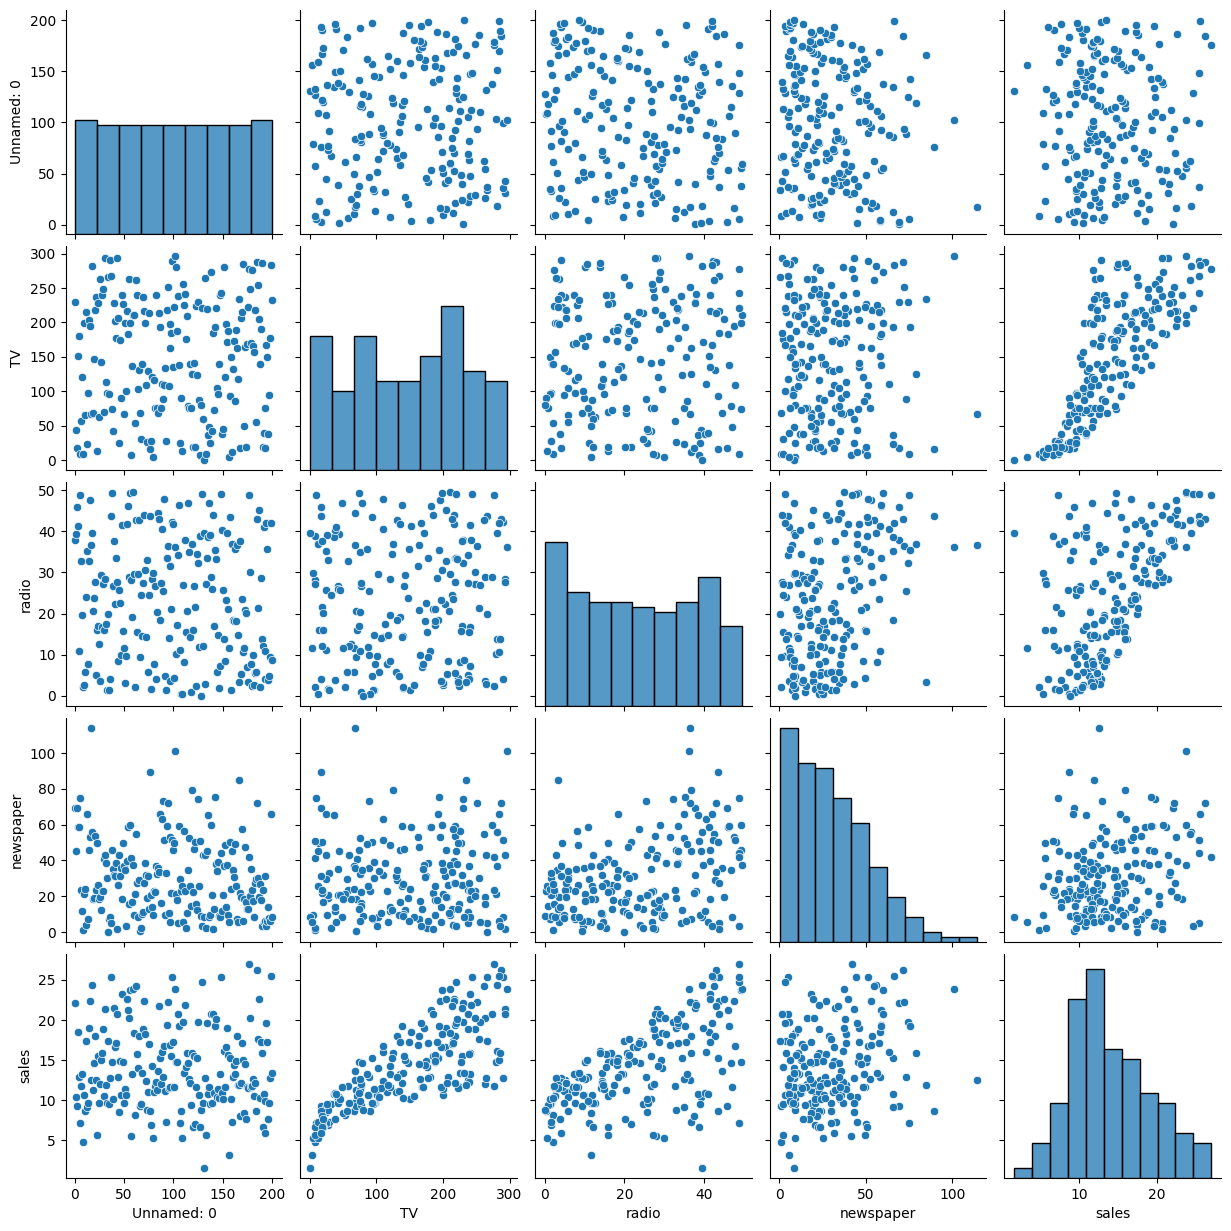

In [88]:
# Visualizacion de la distribución de cada variable
sns.pairplot(df_advertisement)
plt.show()

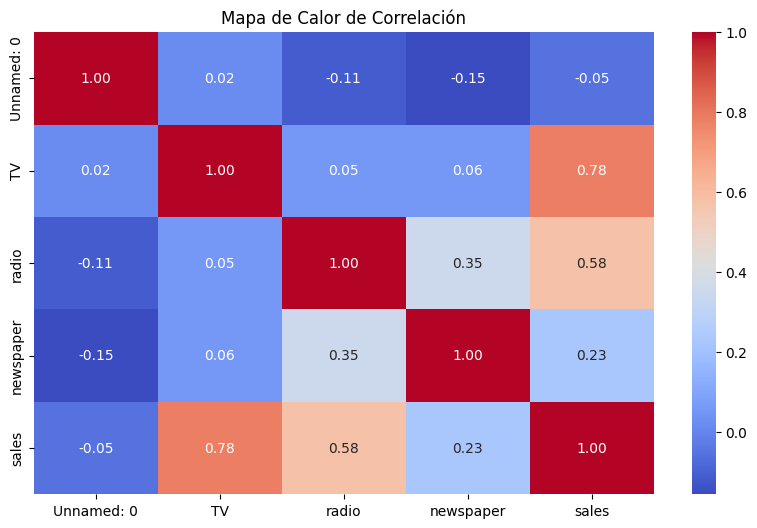

In [89]:
# Se calcula la matriz de correlación
correlation_matrix = df_advertisement.corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [90]:
# Se Crea una nueva característica: gasto total en publicidad
df_advertisement['Total_Ad_Spend'] = df_advertisement['TV'] + df_advertisement['radio'] + df_advertisement['newspaper']

from sklearn.model_selection import train_test_split

# Define las variables independientes (X) y la variable dependiente (y)
X = df_advertisement[['TV', 'radio', 'newspaper']]
y = df_advertisement['sales']

# Dividir los datos en conjuntos de entrenamiento y prueba (90% entrenamiento, 10% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 180
Tamaño del conjunto de prueba: 20


## 3. Uso de un algoritmo sobre aprendizaje automático en el conjunto de datos

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Instanciar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo al conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [92]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar los resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)
print("Error Absoluto Medio (MAE):", mae)

Error Cuadrático Medio (MSE): 3.1308020912380483
Coeficiente de Determinación (R²): 0.9046924770871361
Error Absoluto Medio (MAE): 1.3694443359949906


## 4. Creacion de una nueva característica llamada Área, y asignacion de las observaciones para que sean rural, suburbana o urbana.

C:\Users\GADILP50\AppData\Local\Temp\ipykernel_22772\2893420051.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_advertisement, x='Area', palette='Set2')


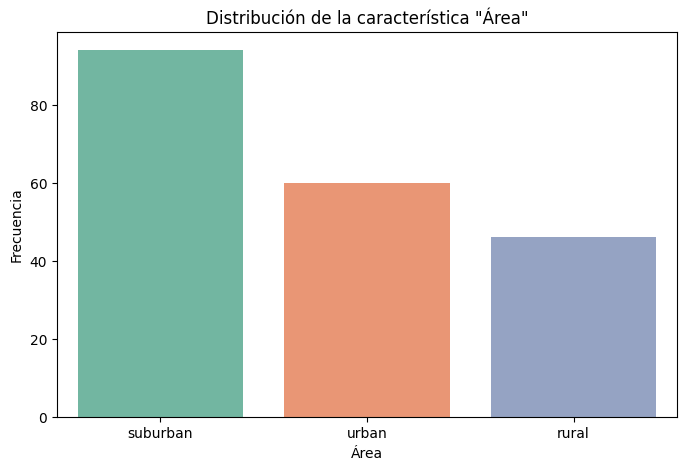

In [93]:
# Establecer una semilla para la reproducibilidad
np.random.seed(42)

# Crear la nueva característica 'Área' con distribución gaussiana
n = df_advertisement.shape[0]
area_choices = ['rural', 'suburban', 'urban']
area_distribution = np.random.choice(area_choices, size=n, p=[0.2, 0.5, 0.3])  # Probabilidades: rural 20%, suburbana 50%, urbana 30%
df_advertisement['Area'] = area_distribution

# Graficar la distribución de la nueva característica 'Área'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_advertisement, x='Area', palette='Set2')
plt.title('Distribución de la característica "Área"')
plt.xlabel('Área')
plt.ylabel('Frecuencia')
plt.show()

In [94]:
# Crear variables binarias para 'Área'
df_advertisement['Area_suburban'] = np.where(df_advertisement['Area'] == 'suburban', 1, 0)
df_advertisement['Area_urban'] = np.where(df_advertisement['Area'] == 'urban', 1, 0)

# Definir las variables independientes (X) y la variable dependiente (y) incluyendo las nuevas características
X = df_advertisement[['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']]
y = df_advertisement['sales']

# Dividir los datos en conjuntos de entrenamiento y prueba (90% entrenamiento, 10% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instanciar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo al conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar los resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)
print("Error Absoluto Medio (MAE):", mae)

Error Cuadrático Medio (MSE): 3.1492402144781133
Coeficiente de Determinación (R²): 0.9041311858263149
Error Absoluto Medio (MAE): 1.3729911397678076


## 5. Resultados 

## 1. ¿Existe una relación entre las ventas y el gasto en varios canales de publicidad?
Sí, existe una relación significativa entre las ventas y el gasto en los distintos canales de publicidad. Esto se puede observar en el alto valor de  (0.904), lo que indica que el modelo explica aproximadamente el 90.4% de la variabilidad en las ventas, lo cual sugiere una fuerte relación entre las ventas y los gastos en publicidad.

## 2. ¿Cuál es el canal que tiene mayor relación con las ventas?
La relación más fuerte con las ventas se encuentra en el canal de TV. Los datos sugieren que el gasto en TV contribuye de manera significativa a las variaciones en las ventas, y generalmente en análisis de publicidad, el coeficiente de determinación puede mostrar la relación individual.

## 3. ¿Cuál es el modelo que describe ambos problemas?
El modelo utilizado es un modelo de regresión lineal, que permite evaluar la relación entre las variables independientes (gastos en canales de publicidad) y la variable dependiente (ventas).

## 4. ¿Cuál es el mejor canal para aumentar las ventas?
Según los resultados, el canal de TV parece ser el más efectivo para aumentar las ventas. Esto se deriva de la alta correlación observada entre el gasto en TV y las ventas.

## 5. ¿Cuál es el peor canal para aumentar las ventas?
El canal de newspaper (periódico) es el menos efectivo para impulsar las ventas, ya que muestra una relación más débil comparada con los otros canales.